In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel(r"C:\Users\pcpoint\Downloads\ArborNov Project Dataset\Solar_Project.xlsx", sheet_name="Sheet1")

In [44]:
df

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,DefectiveNonDefective
0,0.463482,1.378387,101.818848,142.675781,-0.477540,0.335693,0.108271,152.548981,-105.862122,-44.271952,0.476660,50.028196,155.413550,50.000403,0
1,9.251388,1.510834,101.196289,145.898438,0.321410,-0.530396,0.141841,-98.677673,155.104523,-51.046549,0.522298,50.280303,155.202019,49.997730,0
2,9.574456,1.574219,101.110840,142.675781,0.455688,-0.248413,-0.254277,-154.369202,64.877014,88.869375,0.495468,49.702755,154.748381,49.997643,0
3,2.677661,1.504211,100.878906,143.554688,0.200561,0.241699,-0.495977,-67.806244,-82.078705,157.370758,0.490341,50.057212,155.559231,50.005320,0
4,12.472965,1.507996,100.085449,143.261719,0.495971,-0.375977,-0.113286,-144.605103,122.846832,22.457428,0.528099,49.910095,155.204190,50.004243,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,13.004779,2.287537,86.718750,146.484375,-0.699098,0.402832,0.242549,155.176849,-96.893616,-54.040070,0.737964,50.151976,155.885760,50.008200,1
69996,13.703003,2.600677,86.926270,145.019531,-0.551393,0.577393,-0.039434,118.736267,-147.317352,30.373179,0.678638,50.062171,155.736752,50.001420,1
69997,1.207066,2.343353,86.651611,150.000000,-0.605104,0.013428,0.537959,135.371399,1.012573,-132.643077,0.736800,50.046728,156.094840,50.008494,1
69998,14.042468,2.281860,87.072754,146.191406,-0.558106,0.664673,-0.173711,101.341705,-152.332001,56.041107,0.738523,49.980094,155.942848,50.001017,1


### Handle Missing Values

In [5]:
df.isnull().sum()



Time                        0
Ipv                         0
Vpv                         0
Vdc                         0
ia                          0
ib                          0
ic                          0
va                          0
vb                          0
vc                          0
Iabc                        0
If                          0
Vabc                        0
Vf                          0
Defective/Non Defective     0
dtype: int64

#### No Misssing values found 

### Convert Data Types
#### Convert non-numeric columns to numeric to ensure consistency

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

### clean column names 

In [10]:
df.columns = df.columns.str.strip().str.replace(r"[^\w]", "", regex=True)


### Duplicate Rows Based on the "Time" Column Only

In [12]:
duplicates_time = df[df.duplicated(subset=['Time'], keep=False)]


In [13]:
### 150 Duplicate rows found 

### Removing Duplicate rows

In [15]:
df_cleaned = df.drop_duplicates(subset=["Time"])

### Exploratory Data Analysis (EDA)
#### Visualizing Defect Distribution

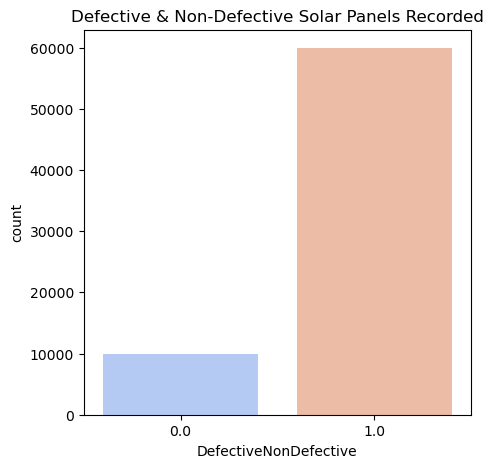

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_cleaned["DefectiveNonDefective"], hue=df["DefectiveNonDefective"], palette='coolwarm', legend=False)  
plt.title("Defective & Non-Defective Solar Panels Recorded")
plt.show()


In [18]:
counts = df_cleaned["DefectiveNonDefective"].value_counts()
print(f"Non-Defective (0): {counts[0]}")
print(f"Defective (1): {counts[1]}")


Non-Defective (0): 10000
Defective (1): 59925


## insights:
### Imbalance in Data – The number of non-defective solar panels is significantly higher than the number of defective ones. This suggests that the dataset is skewed toward non-defective panels.
 

## Feature Correlation Heatmap
### Understanding relationships between different features

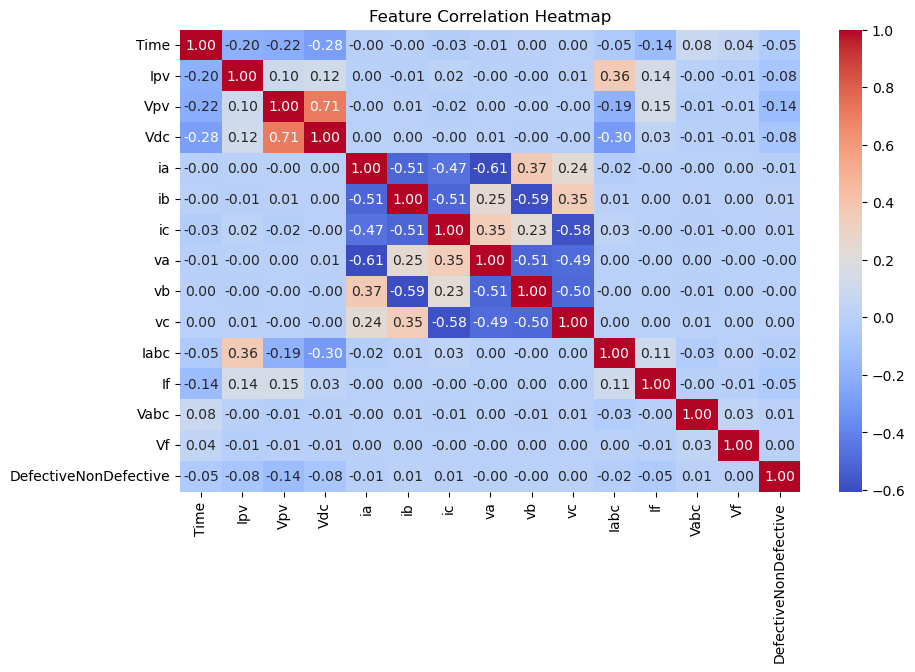

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Insight:
### Strong Feature Interdependencies
#### Some voltage-related variables (e.g., Vdc, Vpv, Vabc) have a strong positive correlation with each other.
#### Similarly, current-based features (ia, ib, ic) show strong interrelations.
### Negative Correlations Between Voltage & Current
#### Certain voltage variables (va, vb, vc) exhibit a negative correlation with some current-related features, indicating an inverse relationship.


### ************** Feature Selection (Keep Important Columns) *********************
#### Selecting only the relevant columns for defect analysis


In [24]:
selected_features = ["Time","Vpv", "Iabc", "Vdc", "Ipv", "Vabc", "Vf", "If", "DefectiveNonDefective"]
df_cleaned = df_cleaned[selected_features]

### ********** Boxplots & Histograms  ************
#### Detecting data spread and outliers in key features


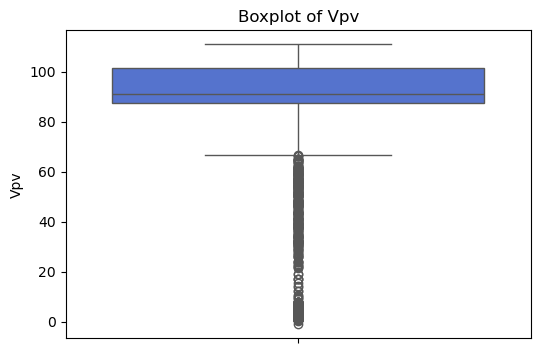

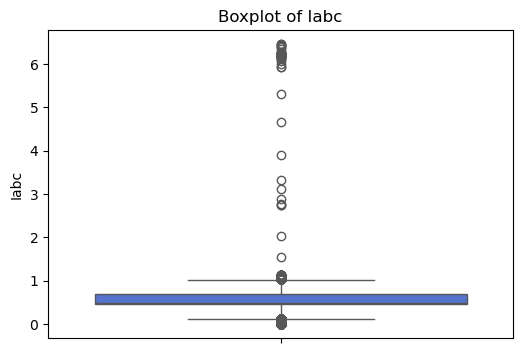

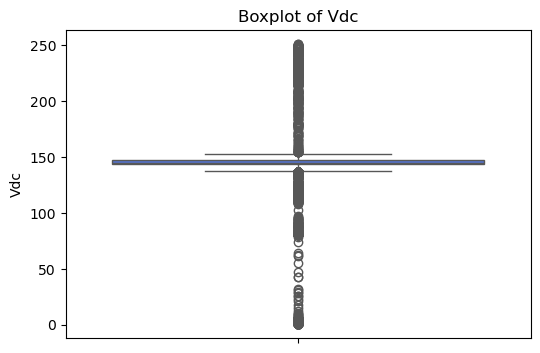

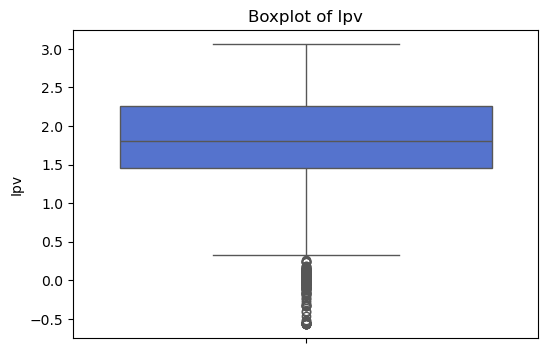

In [26]:
for col in ["Vpv", "Iabc", "Vdc", "Ipv"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_cleaned[col], color='royalblue')  # Single color, no warning
    plt.title(f"Boxplot of {col}")
    plt.show()

## Insights from the Boxplots:
### Presence of Outliers:
#### Iabc, Vdc, and Ipv have significant outliers, indicating unstable measurements or potential sensor errors.
#### Vpv has fewer outliers but still shows some variability.
#### Distribution of Values:

#### Vpv appears to have a relatively tight distribution, meaning most values lie within a small range.
#### Iabc and Vdc have wider distributions, indicating larger fluctuations in the data.
#### Need for Outlier Handling:

#### Since Iabc and Vdc show extreme values, applying techniques like the IQR method or z-score filtering can improve model performance.

### *********** Outlier Detection & Removal (Using IQR Method) ******************


#### Outilier Removal

In [48]:
df_defective = df_cleaned[df_cleaned['DefectiveNonDefective'] == 1]

In [52]:
df_non_defective = df_cleaned[df_cleaned['DefectiveNonDefective'] == 0]

### Outliers detecting for non defective panels

In [56]:
def remove_outliers_iqr(df_defective):
    Q1 = df_defective.quantile(0.25)
    Q3 = df_defective.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_defective[~((df_defective < lower_bound) | (df_defective > upper_bound)).any(axis=1)]

### Remove outliers from the defective panel data

In [64]:
df_defective_cleaned = remove_outliers_iqr(df_defective)

In [66]:
df_defective_cleaned

,Time,Vpv,Iabc,Vdc,Ipv,Vabc,Vf,If,DefectiveNonDefective
10000,6.835397,101.983643,0.424062,143.554688,1.487183,154.861445,50.002180,50.096225,1
10002,11.017371,101.953125,0.433661,140.625000,1.466370,154.851912,50.005271,49.924247,1
10003,2.978580,101.940918,0.450579,144.140625,1.299866,155.643837,49.992715,50.049211,1
10004,1.064353,102.026367,0.484931,144.433594,1.444611,155.355381,49.999457,50.244623,1
10005,9.092073,102.026367,0.427153,142.968750,1.365143,155.328526,50.001351,49.955116,1
...,...,...,...,...,...,...,...,...,...
69995,13.004779,86.718750,0.737964,146.484375,2.287537,155.885760,50.008200,50.151976,1
69996,13.703003,86.926270,0.678638,145.019531,2.600677,155.736752,50.001420,50.062171,1
69997,1.207066,86.651611,0.736800,150.000000,2.343353,156.094840,50.008494,50.046728,1
69998,14.042468,87.072754,0.738523,146.191406,2.281860,155.942848,50.001017,49.980094,1


In [ ]:
### Outliers detecting for non defective panels

In [68]:
def remove_outliers_iqr(df_non_defective):
    Q1 = df_non_defective.quantile(0.25)
    Q3 = df_non_defective.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_non_defective[~((df_non_defective < lower_bound) | (df_non_defective > upper_bound)).any(axis=1)]

In [ ]:
### Remove outliers from the Non defective panel data

In [70]:
df_Non_defective_cleaned = remove_outliers_iqr(df_non_defective)

In [72]:
df_Non_defective_cleaned

,Time,Vpv,Iabc,Vdc,Ipv,Vabc,Vf,If,DefectiveNonDefective
0,0.463482,101.818848,0.476660,142.675781,1.378387,155.413550,50.000403,50.028196,0
1,9.251388,101.196289,0.522298,145.898438,1.510834,155.202019,49.997730,50.280303,0
2,9.574456,101.110840,0.495468,142.675781,1.574219,154.748381,49.997643,49.702755,0
3,2.677661,100.878906,0.490341,143.554688,1.504211,155.559231,50.005320,50.057212,0
4,12.472965,100.085449,0.528099,143.261719,1.507996,155.204190,50.004243,49.910095,0
...,...,...,...,...,...,...,...,...,...
9994,4.911749,90.295410,0.692374,147.949219,2.200500,155.029773,50.010251,50.095414,0
9995,7.545386,90.789795,0.700637,147.656250,2.381195,155.391035,49.999331,50.032188,0
9996,1.848149,90.606689,0.669833,147.363281,2.167389,154.822553,49.986800,50.137508,0
9997,5.940447,90.661621,0.701399,147.070312,2.199554,155.023135,49.994484,49.918314,0


In [ ]:
### Concatenate both cleaned datasets

In [78]:
df_cleaned1 = pd.concat([df_defective_cleaned, df_Non_defective_cleaned])

In [80]:
df_cleaned1

,Time,Vpv,Iabc,Vdc,Ipv,Vabc,Vf,If,DefectiveNonDefective
10000,6.835397,101.983643,0.424062,143.554688,1.487183,154.861445,50.002180,50.096225,1
10002,11.017371,101.953125,0.433661,140.625000,1.466370,154.851912,50.005271,49.924247,1
10003,2.978580,101.940918,0.450579,144.140625,1.299866,155.643837,49.992715,50.049211,1
10004,1.064353,102.026367,0.484931,144.433594,1.444611,155.355381,49.999457,50.244623,1
10005,9.092073,102.026367,0.427153,142.968750,1.365143,155.328526,50.001351,49.955116,1
...,...,...,...,...,...,...,...,...,...
9994,4.911749,90.295410,0.692374,147.949219,2.200500,155.029773,50.010251,50.095414,0
9995,7.545386,90.789795,0.700637,147.656250,2.381195,155.391035,49.999331,50.032188,0
9996,1.848149,90.606689,0.669833,147.363281,2.167389,154.822553,49.986800,50.137508,0
9997,5.940447,90.661621,0.701399,147.070312,2.199554,155.023135,49.994484,49.918314,0


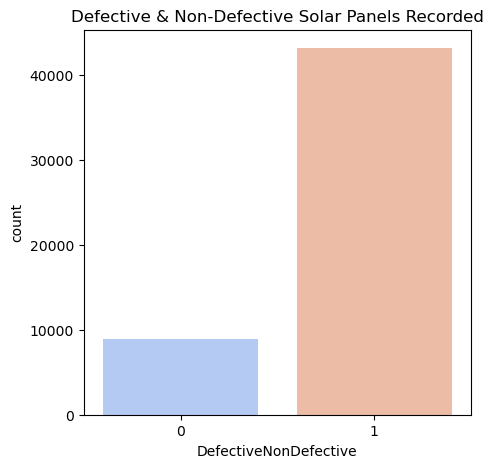

In [82]:
plt.figure(figsize=(5,5))
sns.countplot(x=df_cleaned1["DefectiveNonDefective"], hue=df_cleaned1["DefectiveNonDefective"], palette='coolwarm', legend=False)  
plt.title("Defective & Non-Defective Solar Panels Recorded")
plt.show()


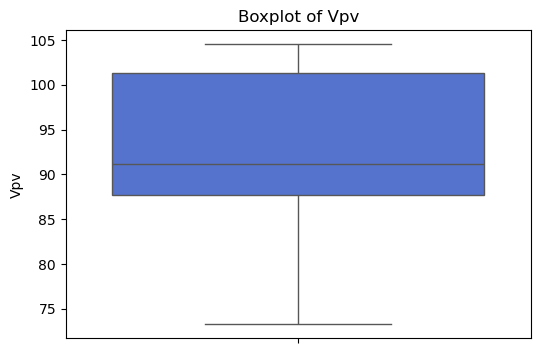

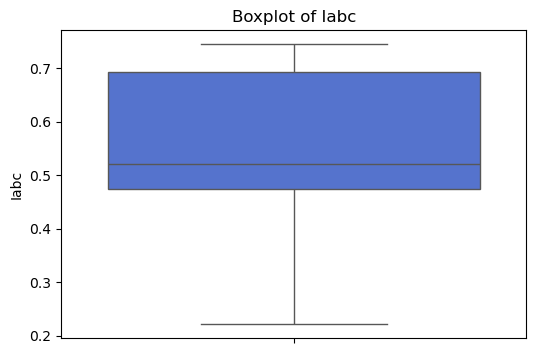

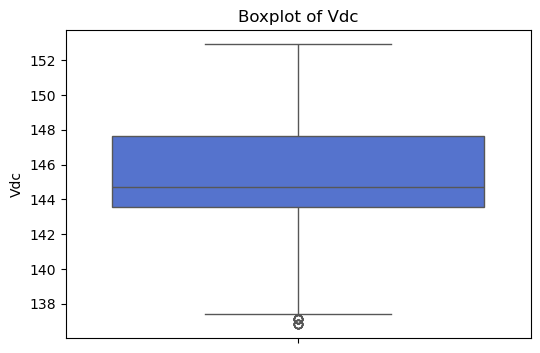

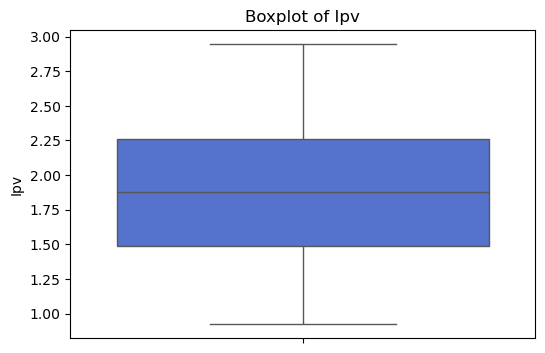

In [84]:
for col in ["Vpv", "Iabc", "Vdc", "Ipv"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_cleaned1[col], color='royalblue')  # Single color, no warning
    plt.title(f"Boxplot of {col}")
    plt.show()

### *********** Summary Statistics  ***********
#### Provides insights into mean, median, min, max, and standard deviation of numeric features


In [95]:
print(df_cleaned1.describe())

               Time           Vpv          Iabc           Vdc           Ipv  \
count  52134.000000  52134.000000  52134.000000  52134.000000  52134.000000   
mean       6.261260     92.906792      0.574268    145.513342      1.893615   
std        3.904283      8.041077      0.114111      2.301364      0.389656   
min        0.020136     73.272705      0.221480    136.816406      0.925232   
25%        2.996301     87.689209      0.473382    143.554688      1.491913   
50%        5.750159     91.101074      0.520935    144.726562      1.875061   
75%        9.260713    101.342773      0.693248    147.656250      2.263885   
max       14.399888    104.528809      0.745272    152.929688      2.945038   

               Vabc            Vf            If  DefectiveNonDefective  
count  52134.000000  52134.000000  52134.000000           52134.000000  
mean     155.364800     50.000121     50.008284               0.829056  
std        0.345290      0.005266      0.122512               0.37646

In [97]:
df_cleaned1.to_excel("cleaned1_data.xlsx", index=False)

In [118]:
# Calculate mode for all numeric columns
mode_values = df_cleaned1.mode()

# Display the result
print("Mode for all columns:\n", mode_values)


Mode for all columns:
             Time         Vpv      Iabc         Vdc       Ipv        Vabc  \
0       0.020136  101.391602  0.427231  143.847656  1.474884  154.588203   
1       0.020139         NaN  0.435156         NaN  1.477722  154.650618   
2       0.020157         NaN  0.443201         NaN  1.478668  154.835581   
3       0.021281         NaN  0.443601         NaN       NaN  154.852825   
4       0.021317         NaN  0.457252         NaN       NaN  154.894411   
...          ...         ...       ...         ...       ...         ...   
52129  14.399064         NaN       NaN         NaN       NaN         NaN   
52130  14.399088         NaN       NaN         NaN       NaN         NaN   
52131  14.399831         NaN       NaN         NaN       NaN         NaN   
52132  14.399864         NaN       NaN         NaN       NaN         NaN   
52133  14.399888         NaN       NaN         NaN       NaN         NaN   

              Vf         If  DefectiveNonDefective  
0      49.9

In [110]:
# Calculate variance for all columns
variance_values = df_cleaned1.var()

# Display the result
print("Variance for all columns:\n", variance_values)

Variance for all columns:
 Time                     15.243428
Vpv                      64.658912
Iabc                      0.013021
Vdc                       5.296278
Ipv                       0.151832
Vabc                      0.119225
Vf                        0.000028
If                        0.015009
DefectiveNonDefective     0.141725
dtype: float64


In [112]:
range_values = df_cleaned1.max() - df_cleaned1.min()

# Display the result
print("Range for all columns:\n", range_values)

Range for all columns:
 Time                     14.379752
Vpv                      31.256104
Iabc                      0.523793
Vdc                      16.113281
Ipv                       2.019806
Vabc                      1.749837
Vf                        0.029744
If                        0.762439
DefectiveNonDefective     1.000000
dtype: float64


In [114]:
# Calculate skewness for all numeric columns
skewness_values = df_cleaned1.skew()

# Display the result
print("Skewness for all columns:\n", skewness_values)

Skewness for all columns:
 Time                     0.349910
Vpv                     -0.529413
Iabc                     0.131634
Vdc                      0.107210
Ipv                      0.006797
Vabc                     0.119544
Vf                      -0.003718
If                       0.137770
DefectiveNonDefective   -1.748208
dtype: float64


In [116]:
# Calculate kurtosis for all numeric columns
kurtosis_values = df_cleaned1.kurt()

# Display the result
print("Kurtosis for all columns:\n", kurtosis_values)

Kurtosis for all columns:
 Time                    -0.967470
Vpv                     -0.375723
Iabc                    -1.599056
Vdc                     -0.935596
Ipv                     -1.534428
Vabc                    -0.719452
Vf                       0.001830
If                       0.418447
DefectiveNonDefective    1.056273
dtype: float64


In [120]:
from IPython.display import FileLink
FileLink("cleaned1_data.xlsx")

C:\Users\pcpoint\cleaned1_data.xlsx